# Orthogonal polynomials

Generate a random polynomial of degree $k$ and then fit it with either Legendre or Chebyshev polynomials of degree $k_\mathrm{fit}$. Because our domain goes from $x=[-2,2]$ whereas the basis functions are defined on $[-1,1]$, we need to rescale $x$ when evaluating the basis functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# first generate some data from a random polynomial
k = 20  # order of polynomial
n = 100   # number of data points

kfit = 18  # number of basis functions for the fit

x = np.linspace(-2,2,n)
a0 = -1.0 + 2*np.random.rand(k+1)
poly = np.polynomial.Polynomial(a0)
y = poly(x) + np.random.normal(scale=0.0, size=n)

# OR try a more complicated function
y = np.exp(np.sin(x**3)) + np.tanh(x)**3

In [3]:
def do_fit(A, y, use_svd = True):
    
    if use_svd:
        U, Sdiag, VT = np.linalg.svd(A,0)
        a = VT.T @ np.diag(1/Sdiag) @ U.T @ y
    else:
        rhs = np.transpose(A)@y
        lhs = np.transpose(A)@A
        a = np.linalg.inv(lhs)@rhs

    return a

Condition number = 3.00281
Chebyshev coefficients:
a0 1.24939
a1 1.3663
a2 0.176774
a3 -0.00196591
a4 -0.0258484
a5 0.607558
a6 0.149407
a7 0.622783
a8 0.0643741
a9 -0.28448
a10 0.00928857
a11 -0.296327
a12 0.114861
a13 -0.0143096
a14 -0.00301711
a15 0.0464009
a16 -0.150359
a17 0.0118609
a18 -0.081184
rms deviation / max(y) = 0.01052955567


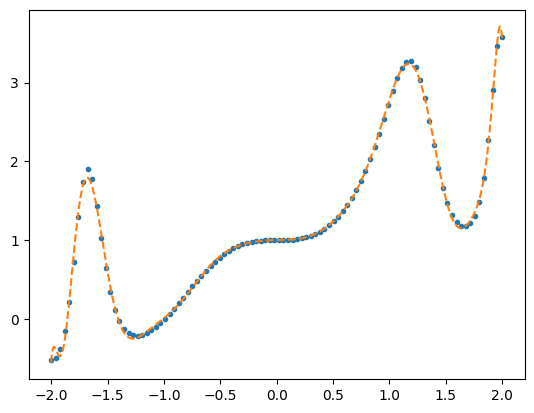

In [4]:
plt.plot(x,y,'.')

# Fit with Chebyshev polynomials
A = np.polynomial.chebyshev.chebvander(x/2,kfit)

print("Condition number = %g" % (np.linalg.cond(A)))

a_cheb = do_fit(A, y)
      
print("Chebyshev coefficients:")
for i in range(len(a_cheb)):
    print("a%d %g" % (i, a_cheb[i]))
    
xx = np.linspace(-2,2,1000)
poly_cheb = np.polynomial.Chebyshev(a_cheb)
yy = poly_cheb(xx/2)
plt.plot(xx,yy,'--')

dev = np.sqrt(np.mean((y-poly_cheb(x/2))**2))
print('rms deviation / max(y) = %.10g' % (dev/np.max(np.abs(y)),))

plt.show()


Condition number = 6.03442
Legendre coefficients:
a0 1.18685
a1 1.25736
a2 0.22062
a3 -0.633234
a4 -0.214353
a5 0.672949
a6 0.248942
a7 1.9391
a8 0.135166
a9 -0.353199
a10 -0.103653
a11 -0.8796
a12 0.440113
a13 -0.128661
a14 0.285391
a15 0.139449
a16 -0.388023
a17 0.0436596
a18 -0.307374
rms deviation / max(y) = 0.01052955567


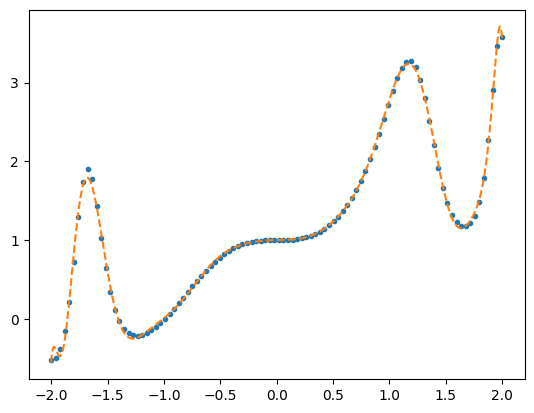

In [5]:
plt.plot(x,y,'.')

# Fit with Legendre polynomials
A = np.polynomial.legendre.legvander(x/2,kfit)

print("Condition number = %g" % (np.linalg.cond(A)))

a_leg = do_fit(A, y)
      
print("Legendre coefficients:")
for i in range(len(a_leg)):
    print("a%d %g" % (i, a_leg[i]))
    
xx = np.linspace(-2,2,1000)
poly_leg = np.polynomial.Legendre(a_leg)
yy = poly_leg(xx/2)
plt.plot(xx,yy,'--')

dev = np.sqrt(np.mean((y-poly_leg(x/2))**2))
print('rms deviation / max(y) = %.10g' % (dev/np.max(np.abs(y)),))

plt.show()
